### **Workshop 3**

### **Task 1**

**Download Dataset (Cifar 10)**

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


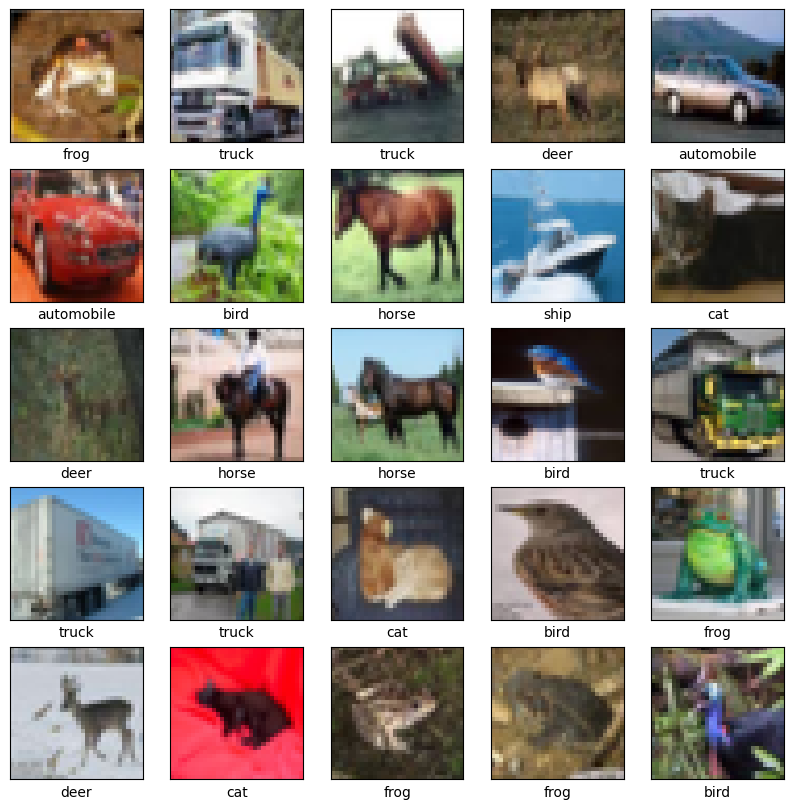

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Creating Architecture**

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, BatchNormalization, Dropout, Flatten
from keras.losses import SparseCategoricalCrossentropy

from keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [ ]:
model = Sequential(name="simple_cnn")

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [ ]:
print(model.summary())

Model: "simple_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0

**Using Learning Rate 0.01**

In [ ]:
optimizer = SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=optimizer,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_with_LR_0_01 = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6457 - accuracy: 0.3982 - val_loss: 1.4529 - val_accuracy: 0.4860
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2437 - accuracy: 0.5576 - val_loss: 1.2504 - val_accuracy: 0.5609
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0772 - accuracy: 0.6215 - val_loss: 1.0512 - val_accuracy: 0.6332
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9659 - accuracy: 0.6574 - val_loss: 1.1342 - val_accuracy: 0.6095
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8857 - accuracy: 0.6881 - val_loss: 0.9688 - val_accuracy: 0.6694
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8154 - accuracy: 0.7118 - val_loss: 1.0039 - val_accuracy: 0.6633
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7531 - accuracy: 0.7337 - val_loss: 1.0608 - val_accuracy:

**Using Learning Rate 0.1**

In [ ]:
model = Sequential(name="simple_cnn")

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

optimizer = SGD(lr=0.1, momentum=0.9)

model.compile(optimizer=optimizer,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_with_LR_0_1 = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6328 - accuracy: 0.4002 - val_loss: 1.3468 - val_accuracy: 0.5253
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2117 - accuracy: 0.5700 - val_loss: 1.1072 - val_accuracy: 0.6061
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0331 - accuracy: 0.6377 - val_loss: 1.0091 - val_accuracy: 0.6482
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9184 - accuracy: 0.6792 - val_loss: 0.9716 - val_accuracy: 0.6608
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8503 - accuracy: 0.6998 - val_loss: 0.9719 - val_accuracy: 0.6614
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7691 - accuracy: 0.7312 - val_loss: 1.0083 - val_accuracy: 0.6601
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7123 - accuracy: 0.7517 - val_loss: 0.9697 - val_accuracy:

**Using Learning Rate 0.001**

In [ ]:
model = Sequential(name="simple_cnn")

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

optimizer = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=optimizer,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_with_LR_0_001 = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6658 - accuracy: 0.3878 - val_loss: 1.3821 - val_accuracy: 0.4953
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2305 - accuracy: 0.5614 - val_loss: 1.1573 - val_accuracy: 0.5891
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0661 - accuracy: 0.6222 - val_loss: 1.0958 - val_accuracy: 0.6206
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9599 - accuracy: 0.6622 - val_loss: 1.0783 - val_accuracy: 0.6253
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8640 - accuracy: 0.6966 - val_loss: 0.9574 - val_accuracy: 0.6754
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7983 - accuracy: 0.7204 - val_loss: 0.9232 - val_accuracy: 0.6845
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7386 - accuracy: 0.7398 - val_loss: 1.0366 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

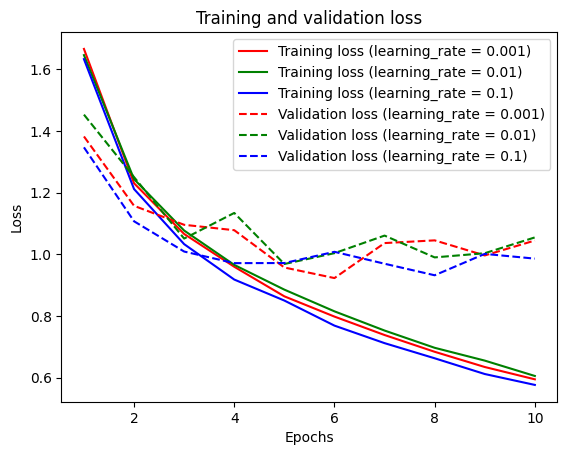

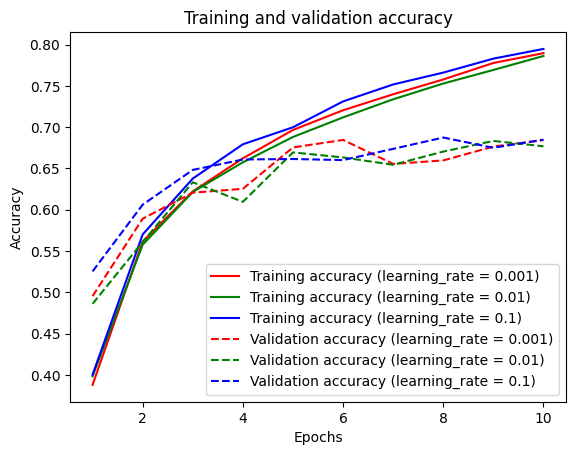

In [ ]:
##################################################################

#plot the training and validation IoU and loss at each epoch
loss_0_001 = history_with_LR_0_001.history['loss']
loss_0_01 = history_with_LR_0_01.history['loss']
loss_0_1 = history_with_LR_0_1.history['loss']


val_loss_0_001 = history_with_LR_0_001.history['val_loss']
val_loss_0_01 = history_with_LR_0_01.history['val_loss']
val_loss_0_1 = history_with_LR_0_1.history['val_loss']


epochs = range(1, len(val_loss_0_001) + 1)
plt.plot(epochs, loss_0_001, 'r', label='Training loss (learning_rate = 0.001)')
plt.plot(epochs, loss_0_01, 'g', label='Training loss (learning_rate = 0.01)')
plt.plot(epochs, loss_0_1, 'b', label='Training loss (learning_rate = 0.1)')


plt.plot(epochs, val_loss_0_001, 'r', label='Validation loss (learning_rate = 0.001)', linestyle='dashed')
plt.plot(epochs, val_loss_0_01, 'g', label='Validation loss (learning_rate = 0.01)', linestyle='dashed')
plt.plot(epochs, val_loss_0_1, 'b', label='Validation loss (learning_rate = 0.1)', linestyle='dashed')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_0_001 = history_with_LR_0_001.history['accuracy']
acc_0_01 = history_with_LR_0_01.history['accuracy']
acc_0_1 = history_with_LR_0_1.history['accuracy']


val_acc_0_001 = history_with_LR_0_001.history['val_accuracy']
val_acc_0_01 = history_with_LR_0_01.history['val_accuracy']
val_acc_0_1 = history_with_LR_0_1.history['val_accuracy']

plt.plot(epochs, acc_0_001, 'r', label='Training accuracy (learning_rate = 0.001)')
plt.plot(epochs, acc_0_01, 'g', label='Training accuracy (learning_rate = 0.01)')
plt.plot(epochs, acc_0_1, 'b', label='Training accuracy (learning_rate = 0.1)')


plt.plot(epochs, val_acc_0_001, 'r', label='Validation accuracy (learning_rate = 0.001)', linestyle='dashed')
plt.plot(epochs, val_acc_0_01, 'g', label='Validation accuracy (learning_rate = 0.01)', linestyle='dashed')
plt.plot(epochs, val_acc_0_1, 'b', label='Validation accuracy (learning_rate = 0.1)', linestyle='dashed')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

### **changing optimization method**

In [ ]:
model = Sequential(name="simple_cnn")

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

**SGD (Stochastic Gradient Decent)**

In [ ]:
sgd_model = model
optimizer = SGD()

sgd_model.compile(optimizer=optimizer,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_sgd_model = sgd_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0806 - accuracy: 0.2355 - val_loss: 1.8503 - val_accuracy: 0.3309
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6931 - accuracy: 0.3919 - val_loss: 1.5451 - val_accuracy: 0.4369
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4961 - accuracy: 0.4609 - val_loss: 1.4333 - val_accuracy: 0.4800
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3701 - accuracy: 0.5124 - val_loss: 1.3446 - val_accuracy: 0.5230
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2731 - accuracy: 0.5482 - val_loss: 1.2921 - val_accuracy: 0.5436
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1970 - accuracy: 0.5750 - val_loss: 1.1713 - val_accuracy: 0.5847
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1343 - accuracy: 0.6003 - val_loss: 1.1051 - val_accuracy:

**RMSprop**

In [ ]:
rmsprop_model = model
optimizer = RMSprop()

rmsprop_model.compile(optimizer=optimizer,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_rmsprop_model = rmsprop_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5330 - accuracy: 0.4478 - val_loss: 1.3387 - val_accuracy: 0.5234
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1314 - accuracy: 0.6020 - val_loss: 1.1421 - val_accuracy: 0.5977
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9694 - accuracy: 0.6614 - val_loss: 1.1350 - val_accuracy: 0.6068
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8575 - accuracy: 0.7018 - val_loss: 0.9354 - val_accuracy: 0.6772
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7804 - accuracy: 0.7294 - val_loss: 0.9444 - val_accuracy: 0.6867
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7136 - accuracy: 0.7525 - val_loss: 0.9233 - val_accuracy: 0.6921
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6583 - accuracy: 0.7697 - val_loss: 0.9214 - val_accuracy:

**Adam**

In [ ]:
adam_model = model
optimizer = Adam()

adam_model.compile(optimizer=optimizer,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_adam_model = adam_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5051 - accuracy: 0.4489 - val_loss: 1.2344 - val_accuracy: 0.5566
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1394 - accuracy: 0.5970 - val_loss: 1.0991 - val_accuracy: 0.6100
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9916 - accuracy: 0.6494 - val_loss: 0.9675 - val_accuracy: 0.6640
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8925 - accuracy: 0.6840 - val_loss: 0.9611 - val_accuracy: 0.6701
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8126 - accuracy: 0.7143 - val_loss: 0.8645 - val_accuracy: 0.7037
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7575 - accuracy: 0.7339 - val_loss: 0.8376 - val_accuracy: 0.7063
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7049 - accuracy: 0.7525 - val_loss: 0.8514 - val_accuracy

**Adagrad**

In [ ]:
adagrad_model = model
optimizer = Adagrad()

adagrad_model.compile(optimizer=optimizer,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_adagrad_model = adagrad_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4324 - accuracy: 0.8525 - val_loss: 0.8015 - val_accuracy: 0.7366
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4119 - accuracy: 0.8596 - val_loss: 0.8031 - val_accuracy: 0.7381
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4040 - accuracy: 0.8617 - val_loss: 0.8040 - val_accuracy: 0.7405
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3986 - accuracy: 0.8630 - val_loss: 0.8067 - val_accuracy: 0.7392
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3947 - accuracy: 0.8645 - val_loss: 0.8075 - val_accuracy: 0.7392
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3916 - accuracy: 0.8656 - val_loss: 0.8083 - val_accuracy: 0.7406
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3889 - accuracy: 0.8669 - val_loss: 0.8111 - val_accurac

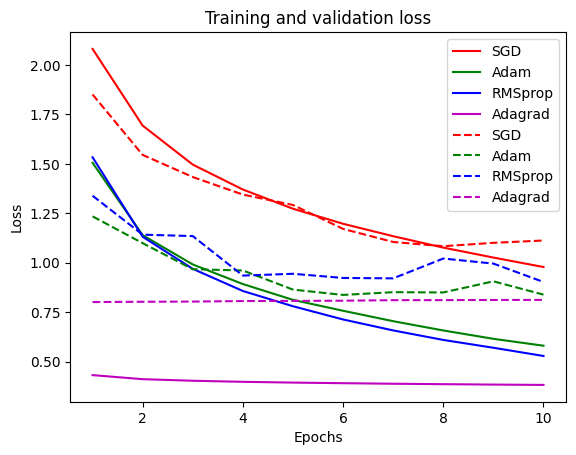

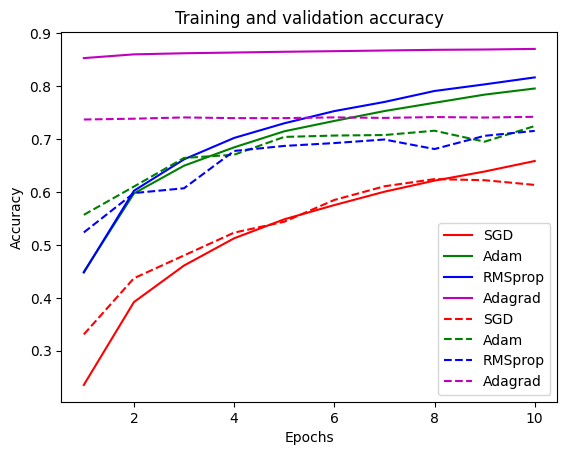

In [ ]:
##################################################################

#plot the training and validation IoU and loss at each epoch
loss_sgd = history_sgd_model.history['loss']
loss_adam = history_adam_model.history['loss']
loss_rmsprop = history_rmsprop_model.history['loss']
loss_adagrad = history_adagrad_model.history['loss']


val_loss_sgd = history_sgd_model.history['val_loss']
val_loss_adam = history_adam_model.history['val_loss']
val_loss_rmsprop = history_rmsprop_model.history['val_loss']
val_loss_adagrad = history_adagrad_model.history['val_loss']


epochs = range(1, len(val_loss_0_001) + 1)
plt.plot(epochs, loss_sgd, 'r', label='SGD')
plt.plot(epochs, loss_adam, 'g', label='Adam')
plt.plot(epochs, loss_rmsprop, 'b', label='RMSprop')
plt.plot(epochs, loss_adagrad, 'm', label='Adagrad')


plt.plot(epochs, val_loss_sgd, 'r', label='SGD', linestyle='dashed')
plt.plot(epochs, val_loss_adam, 'g', label='Adam', linestyle='dashed')
plt.plot(epochs, val_loss_rmsprop, 'b', label='RMSprop', linestyle='dashed')
plt.plot(epochs, val_loss_adagrad, 'm', label='Adagrad', linestyle='dashed')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_sgd = history_sgd_model.history['accuracy']
acc_adam = history_adam_model.history['accuracy']
acc_rmsprop = history_rmsprop_model.history['accuracy']
acc_adagrad = history_adagrad_model.history['accuracy']


val_acc_sgd = history_sgd_model.history['val_accuracy']
val_acc_adam = history_adam_model.history['val_accuracy']
val_acc_rmsprop = history_rmsprop_model.history['val_accuracy']
val_acc_adagrad = history_adagrad_model.history['val_accuracy']

plt.plot(epochs, acc_sgd, 'r', label='SGD')
plt.plot(epochs, acc_adam, 'g', label='Adam')
plt.plot(epochs, acc_rmsprop, 'b', label='RMSprop')
plt.plot(epochs, acc_adagrad, 'm', label='Adagrad')


plt.plot(epochs, val_acc_sgd, 'r', label='SGD', linestyle='dashed')
plt.plot(epochs, val_acc_adam, 'g', label='Adam', linestyle='dashed')
plt.plot(epochs, val_acc_rmsprop, 'b', label='RMSprop', linestyle='dashed')
plt.plot(epochs, val_acc_adagrad, 'm', label='Adagrad', linestyle='dashed')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

### **Task 2**

**Training pretrained CNN networks on Cifar 10 dataset**

In [13]:
from keras.applications import ResNet101, ResNet50, VGG16, InceptionV3, VGG19

In [6]:
resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=len(class_names),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        pass


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
resnet_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
resnet_model.add(Dense(10))

print(resnet_model.summary())



resnet_model.compile(optimizer='adam',
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_resnet_model = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 24146442 (92.11 MB)
Trainable params: 558730 (2.13 MB)
Non-trainable params: 23587712 (89.98 MB)
____________

In [7]:
resnet101_model = Sequential()

pretrained_model= ResNet101(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=len(class_names),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        pass


resnet101_model.add(pretrained_model)
resnet101_model.add(Flatten())
resnet101_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
resnet101_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
resnet101_model.add(Dense(10))

print(resnet101_model.summary())



resnet101_model.compile(optimizer='adam',
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_resnet101_model = resnet101_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

171446536/171446536 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 43216906 (164.86 MB)
Trainable params: 558730 (2.13 MB)
Non-trainable params: 42658176 (162.73 MB)
______

In [8]:
vgg_model = Sequential()

pretrained_model= VGG16(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=len(class_names),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        pass


vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
vgg_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
vgg_model.add(Dense(10))

print(vgg_model.summary())



vgg_model.compile(optimizer='adam',
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_vgg_model = vgg_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14880202 (56.76 MB)
Trainable params: 165514 (646.54 KB)
Non-trainable params: 14714688 (56.13 MB)
________

In [14]:
vgg19_model = Sequential()

pretrained_model= VGG19(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=len(class_names),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        pass


vgg19_model.add(pretrained_model)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
vgg19_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
vgg19_model.add(Dense(10))

print(vgg19_model.summary())



vgg19_model.compile(optimizer='adam',
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_vgg19_model = vgg19_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 20189898 (77.02 MB)
Trainable params: 165514 (646.54 KB)
Non-trainable params: 20024384 (76.39 MB)
________

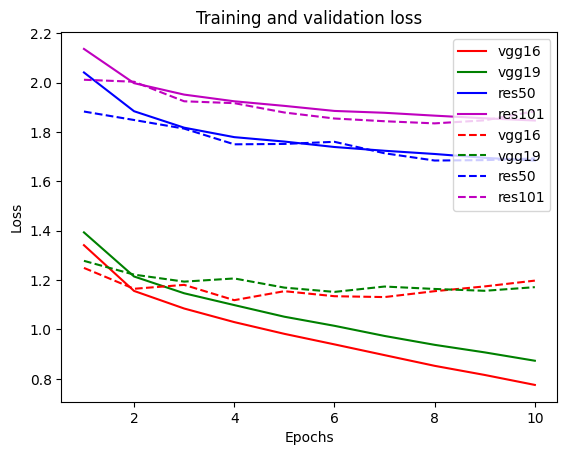

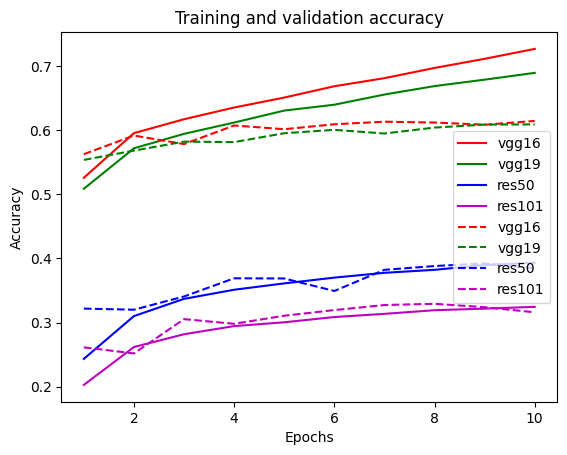

In [16]:
##################################################################

#plot the training and validation IoU and loss at each epoch
loss_vgg16 = history_vgg_model.history['loss']
loss_vgg19 = history_vgg19_model.history['loss']
loss_res50 = history_resnet_model.history['loss']
loss_res101 = history_resnet101_model.history['loss']


val_loss_vgg16 = history_vgg_model.history['val_loss']
val_loss_vgg19 = history_vgg19_model.history['val_loss']
val_loss_res50 = history_resnet_model.history['val_loss']
val_loss_res101 = history_resnet101_model.history['val_loss']


epochs = range(1, len(val_loss_vgg16) + 1)
plt.plot(epochs, loss_vgg16, 'r', label='vgg16')
plt.plot(epochs, loss_vgg19, 'g', label='vgg19')
plt.plot(epochs, loss_res50, 'b', label='res50')
plt.plot(epochs, loss_res101, 'm', label='res101')


plt.plot(epochs, val_loss_vgg16, 'r', label='vgg16', linestyle='dashed')
plt.plot(epochs, val_loss_vgg19, 'g', label='vgg19', linestyle='dashed')
plt.plot(epochs, val_loss_res50, 'b', label='res50', linestyle='dashed')
plt.plot(epochs, val_loss_res101, 'm', label='res101', linestyle='dashed')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_vgg16 = history_vgg_model.history['accuracy']
acc_vgg19 = history_vgg19_model.history['accuracy']
acc_res50 = history_resnet_model.history['accuracy']
acc_res101 = history_resnet101_model.history['accuracy']


val_acc_vgg16 = history_vgg_model.history['val_accuracy']
val_acc_vgg19 = history_vgg19_model.history['val_accuracy']
val_acc_res50 = history_resnet_model.history['val_accuracy']
val_acc_res101 = history_resnet101_model.history['val_accuracy']

plt.plot(epochs, acc_vgg16, 'r', label='vgg16')
plt.plot(epochs, acc_vgg19, 'g', label='vgg19')
plt.plot(epochs, acc_res50, 'b', label='res50')
plt.plot(epochs, acc_res101, 'm', label='res101')


plt.plot(epochs, val_acc_vgg16, 'r', label='vgg16', linestyle='dashed')
plt.plot(epochs, val_acc_vgg19, 'g', label='vgg19', linestyle='dashed')
plt.plot(epochs, val_acc_res50, 'b', label='res50', linestyle='dashed')
plt.plot(epochs, val_acc_res101, 'm', label='res101', linestyle='dashed')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################